In [ ]:
install.packages("plyr")
install.packages("arules")
install.packages("arulesViz")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘gridExtra’, ‘bitops’, ‘zoo’, ‘foreach’, ‘viridis’, ‘gtools’, ‘caTools’, ‘lmtest’, ‘TSP’, ‘qap’, ‘gclus’, ‘dendextend’, ‘gplots’, ‘registry’, ‘hexbin’, ‘data.table’, ‘scatterplot3d’, ‘vcd’, ‘seriation’, ‘igraph’, ‘plotly’, ‘visNetwork’




In [ ]:
#Import any necessary packages
library(readxl) #Reads excel files
library(plyr) #Combines data - in this case, into basket format
library(arules) #Analyses frequent itemsets and association rules
library(arulesViz) #For visualisations

#Read in the data
data <- read_xls("/content/copy_jan_oct 2020.xls")
#Convert to dataframe
data = data.frame(data)
#Preview the data
head(data)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write


Loading required package: grid



,No..Pesanan,Status.Pesanan,Status.Pembatalan..Pengembalian,No..Resi,Opsi.Pengiriman,Antar.ke.counter..pick.up,Pesanan.Harus.Dikirimkan.Sebelum..Menghindari.keterlambatan.,Waktu.Pengiriman.Diatur,Waktu.Pesanan.Dibuat,Waktu.Pembayaran.Dilakukan,⋯,Perkiraan.Ongkos.Kirim,Catatan.dari.Pembeli,Catatan,Username..Pembeli.,Nama.Penerima,No..Telepon,Alamat.Pengiriman,Kota.Kabupaten,Provinsi,Waktu.Pesanan.Selesai
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,200104R51ASG7Y,Selesai,NA,JP9382445282,J&T Express,Antar ke Counter,2020-01-07 16:41,2020-01-04 17:24,2020-01-04 16:40,2020-01-04 16:41,⋯,Rp 10.000,Konfirmasi kalo warna tidak ada,NA,anisaftr20,Anisa Fitri,628978239088,"Jalan sentosa 3 no. 7 Rt : 007/010 (Kodamar) komplek TNI-AL, kelapa gading barat, jakarta utara, KOTA JAKARTA UTARA, KELAPA GADING, DKI JAKARTA, ID, 14240",KOTA JAKARTA UTARA,DKI JAKARTA,2020-01-06 17:25
2,2001060CQPT22W,Selesai,NA,JP1428169858,J&T Express,Antar ke Counter,2020-01-08 19:41,2020-01-07 14:30,2020-01-06 19:41,2020-01-06 19:41,⋯,Rp 16.000,NA,NA,nila1622,Nila,6281315541322,"Kp tegal wangi,rt/rw 005/002,desa ciagel,kecamatan KIBIN, KAB. SERANG, KIBIN, BANTEN, ID, 42185",KAB. SERANG,BANTEN,2020-01-09 22:18
3,2001060CQPT22W,Selesai,NA,JP1428169858,J&T Express,Antar ke Counter,2020-01-08 19:41,2020-01-07 14:30,2020-01-06 19:41,2020-01-06 19:41,⋯,Rp 16.000,NA,NA,nila1622,Nila,6281315541322,"Kp tegal wangi,rt/rw 005/002,desa ciagel,kecamatan KIBIN, KAB. SERANG, KIBIN, BANTEN, ID, 42185",KAB. SERANG,BANTEN,2020-01-09 22:18
4,200107214TE063,Selesai,NA,JP4207709254,J&T Express,Antar ke Counter,2020-01-09 16:21,2020-01-07 18:01,2020-01-07 11:19,2020-01-07 16:21,⋯,Rp 39.000,Hitam 2 ungu 1 abu abu 1 navy 1 orange 1,NA,raflifirdausfalaka25,Rafli Firdaus Falaka,6282333188827,"Jl raya ganding no 32 ganding sumenep, sebelah barat pasar ganding (rumah pak sabar), KAB. SUMENEP, GANDING, JAWA TIMUR, ID, 69462",KAB. SUMENEP,JAWA TIMUR,2020-01-11 05:47
5,200107214TE063,Selesai,NA,JP4207709254,J&T Express,Antar ke Counter,2020-01-09 16:21,2020-01-07 18:01,2020-01-07 11:19,2020-01-07 16:21,⋯,Rp 39.000,Hitam 2 ungu 1 abu abu 1 navy 1 orange 1,NA,raflifirdausfalaka25,Rafli Firdaus Falaka,6282333188827,"Jl raya ganding no 32 ganding sumenep, sebelah barat pasar ganding (rumah pak sabar), KAB. SUMENEP, GANDING, JAWA TIMUR, ID, 69462",KAB. SUMENEP,JAWA TIMUR,2020-01-11 05:47
6,200107214TE063,Selesai,NA,JP4207709254,J&T Express,Antar ke Counter,2020-01-09 16:21,2020-01-07 18:01,2020-01-07 11:19,2020-01-07 16:21,⋯,Rp 39.000,Hitam 2 ungu 1 abu abu 1 navy 1 orange 1,NA,raflifirdausfalaka25,Rafli Firdaus Falaka,6282333188827,"Jl raya ganding no 32 ganding sumenep, sebelah barat pasar ganding (rumah pak sabar), KAB. SUMENEP, GANDING, JAWA TIMUR, ID, 69462",KAB. SUMENEP,JAWA TIMUR,2020-01-11 05:47


In [ ]:
data2 <- data[which(data$Status.Pesanan!="Batal"),]

In [ ]:
data2[,'Nama.Produk'] <- gsub(",","",data2[,'Nama.Produk'])

In [ ]:
data2 <- data2[,c(1,12)]

In [ ]:
#Ignore quantities for now - this may be important in the future
data_basket <- ddply(data2,"No..Pesanan", function(df1)paste(df1$Nama.Produk, collapse = ","))
data_basket

No..Pesanan,V1
<chr>,<chr>
200104R51ASG7Y,ZOYA BERGO OFFICE
2001060CQPT22W,"ZOYA MARSHA HB CASUAL,ZOYA MARSHA HB CASUAL"
2001071C6G852E,"ZOYA BERGO OFFICE,ZOYA BERGO OFFICE,ZOYA BERGO OFFICE"
200107214TE063,"ZOYA KALILA NALANIE,ZOYA KALILA NALANIE,ZOYA KALILA NALANIE,ZOYA KALILA NALANIE,ZOYA KALILA NALANIE"
2001084T4J88HQ,"ZOYA MARSHA SS CASUAL,ZOYA BERGO OFFICE,ZOYA BERGO OFFICE"
20010979AAF8KM,ZOYA MARSHA SPARKLING ZOYA
2001097CJKDCFN,"ZOYA MARSHA FRILL,ZOYA MARSHA GLITERING ZOYA,ZOYA KERUDUNG INSTANT KAMILA,ZOYA BERGO ZALIFA,ZOYA FARIDA LAYER MOTIF,ZOYA FARIDA FANCY LACE,ZOYA KALILA SPORT FAYRA,ZOYA BERGO LAUREN,ZOYA MARSHA SPARKLING ZOYA,ZOYA BERGO ROWENA,ZOYA BERGO AZIZAH ANTEM"
2001097NA8PBS4,ZOYA MARSHA SB CASUAL
2001109H8HD61Y,"ZOYA MARSHA GLITTERING,ZOYA MARSHA SPARKLING ZOYA,ZOYA MARSHA SPARKLING ZOYA,ZOYA MARSHA SPARKLING ZOYA"


In [ ]:
#Write formatted file to csv
write.csv(data_basket,"Transaksi.csv", quote = FALSE, row.names = TRUE)

In [ ]:
#Read in transaction files
#Turns off warnings
options(warn=-1)
txn = read.transactions(file="/content/Transaksi.csv", format="basket",sep=",", cols=1)
#Turns warnings back on
options(warn=0)

In [ ]:
summary(txn)

transactions as itemMatrix in sparse format with
 1138 rows (elements/itemsets/transactions) and
 1321 columns (items) and a density of 0.001805364 

most frequent items:
       ZOYA KALILA NALANIE ZOYA MARSHA SPARKLING ZOYA 
                       179                         90 
   ZOYA BERGO ADRIA CASUAL          ZOYA BERGO SHOPIA 
                        70                         70 
   ZOYA BERGO HUSNA CASUAL                    (Other) 
                        69                       2236 

element (itemset/transaction) length distribution:
sizes
  2   3   4   5   6   7   9  12 
845 198  68  15   8   2   1   1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.385   3.000  12.000 

includes extended item information - examples:
          labels
1 200104R51ASG7Y
2 2001060CQPT22W
3 2001071C6G852E

includes extended transaction information - examples:
  transactionID
1              
2             1
3             2

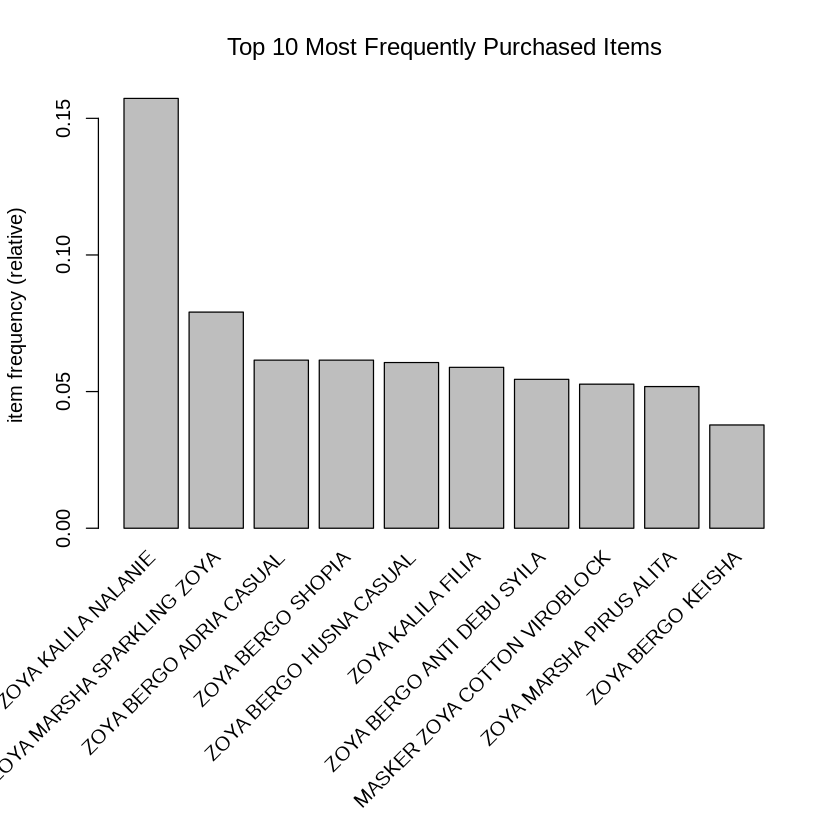

In [ ]:
#Graph to display top x most frequently purchased items
x = 10
itemFrequencyPlot(txn, topN = x, main=bquote(paste("Top ",.(x)," Most Frequently Purchased Items")))

In [ ]:
#Run apriori
basket_rules <- apriori(txn,parameter = list(sup = 0.001, conf = 0.8, target="rules"))
#Summary statistics
summary(basket_rules)
inspect(head(basket_rules))
#Find minimum lift
min(basket_rules@quality$lift)
length(basket_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 15 rules

rule length distribution (lhs + rhs):sizes
2 3 4 
2 9 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.133   3.500   4.000 

summary of quality measures:
    support           confidence    coverage             lift        
 Min.   :0.001757   Min.   :1    Min.   :0.001757   Min.   :  6.358  
 1st Qu.:0.001757   1st Qu.:1    1st Qu.:0.001757   1st Qu.: 16.257  
 Median :0.001757   Median :1    Median :0.001757   Median : 19.288  
 Mean   :0.001816   Mean   :1    Mean   :0.001816   Mean   : 37.357  
 3rd Qu.:0.001757   3rd Qu.:1    3rd Qu.:0.001757   3rd Qu.: 46.938  
 Max.   :0.002636   Max.   :1    Max.   :0.002636   Max.   :162.571  
     count      
 Min.   :2.000  
 1st Qu.:2.000  
 Median :2.000  
 Mean   :2.067  
 3rd Qu.:2.000  
 Max.   :3.000  

mining info:
 data ntransactions support confidence
  txn          1138   0.001        0.8

    lhs                                                   rhs                                                    support confidence    coverage      lift count
[1] {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ARSAMEIA} => {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ANAVORSA} 0.001757469          1 0.001757469 162.57143     2
[2] {ZOYA SELENDANG INSTAN FLOW}                       => {ZOYA MARSHA PIRUS ALITA}                          0.002636204          1 0.002636204  19.28814     3
[3] {ZOYA SELENDANG INSTAN FLOW,                                                                                                                               
     ZOYA SELENDANG INSTAN KHALISA}                    => {ZOYA MARSHA PIRUS ALITA}                          0.001757469          1 0.001757469  19.28814     2
[4] {ZOYA MARSHA SB CASUAL,                                                                                                                                    
     ZOYA MARSHA SL CASUAL}             

[1] 6.357542

[1] 15

In [ ]:
#Inspecting rules in order of confidence
rules_conf <- sort (basket_rules, by="confidence", decreasing=TRUE) # 'high-confidence' rules.
#Summary Statistics
inspect(head(rules_conf))
summary(rules_conf)

    lhs                                                   rhs                                                    support confidence    coverage      lift count
[1] {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ARSAMEIA} => {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ANAVORSA} 0.001757469          1 0.001757469 162.57143     2
[2] {ZOYA SELENDANG INSTAN FLOW}                       => {ZOYA MARSHA PIRUS ALITA}                          0.002636204          1 0.002636204  19.28814     3
[3] {ZOYA SELENDANG INSTAN FLOW,                                                                                                                               
     ZOYA SELENDANG INSTAN KHALISA}                    => {ZOYA MARSHA PIRUS ALITA}                          0.001757469          1 0.001757469  19.28814     2
[4] {ZOYA MARSHA SB CASUAL,                                                                                                                                    
     ZOYA MARSHA SL CASUAL}             

set of 15 rules

rule length distribution (lhs + rhs):sizes
2 3 4 
2 9 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.133   3.500   4.000 

summary of quality measures:
    support           confidence    coverage             lift        
 Min.   :0.001757   Min.   :1    Min.   :0.001757   Min.   :  6.358  
 1st Qu.:0.001757   1st Qu.:1    1st Qu.:0.001757   1st Qu.: 16.257  
 Median :0.001757   Median :1    Median :0.001757   Median : 19.288  
 Mean   :0.001816   Mean   :1    Mean   :0.001816   Mean   : 37.357  
 3rd Qu.:0.001757   3rd Qu.:1    3rd Qu.:0.001757   3rd Qu.: 46.938  
 Max.   :0.002636   Max.   :1    Max.   :0.002636   Max.   :162.571  
     count      
 Min.   :2.000  
 1st Qu.:2.000  
 Median :2.000  
 Mean   :2.067  
 3rd Qu.:2.000  
 Max.   :3.000  

mining info:
 data ntransactions support confidence
  txn          1138   0.001        0.8

In [ ]:
#Inspecting rules in order of confidence
rules_conf <- sort (basket_rules, by="lift", decreasing=TRUE) # 'high-lift' rules.
#Summary Statistics
inspect(head(rules_conf))
summary(rules_conf)

    lhs                                                   rhs                                                    support confidence    coverage      lift count
[1] {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ARSAMEIA} => {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ANAVORSA} 0.001757469          1 0.001757469 162.57143     2
[2] {ZOYA MARSHA SL CASUAL,                                                                                                                                    
     ZOYA MARSHA SS CASUAL}                            => {ZOYA MARSHA SB CASUAL}                            0.001757469          1 0.001757469  75.86667     2
[3] {ZOYA BERGO ADRIA CASUAL,                                                                                                                                  
     ZOYA BERGO HANNAH,                                                                                                                                        
     ZOYA KALILA NALANIE}               

set of 15 rules

rule length distribution (lhs + rhs):sizes
2 3 4 
2 9 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.133   3.500   4.000 

summary of quality measures:
    support           confidence    coverage             lift        
 Min.   :0.001757   Min.   :1    Min.   :0.001757   Min.   :  6.358  
 1st Qu.:0.001757   1st Qu.:1    1st Qu.:0.001757   1st Qu.: 16.257  
 Median :0.001757   Median :1    Median :0.001757   Median : 19.288  
 Mean   :0.001816   Mean   :1    Mean   :0.001816   Mean   : 37.357  
 3rd Qu.:0.001757   3rd Qu.:1    3rd Qu.:0.001757   3rd Qu.: 46.938  
 Max.   :0.002636   Max.   :1    Max.   :0.002636   Max.   :162.571  
     count      
 Min.   :2.000  
 1st Qu.:2.000  
 Median :2.000  
 Mean   :2.067  
 3rd Qu.:2.000  
 Max.   :3.000  

mining info:
 data ntransactions support confidence
  txn          1138   0.001        0.8

In [ ]:
#Inspecting rules in order of confidence
rules_conf <- sort (basket_rules, by="count", decreasing=TRUE) # 'high-count' rules.
#Summary Statistics
inspect(head(rules_conf))
summary(rules_conf)

    lhs                                                   rhs                                                    support confidence    coverage      lift count
[1] {ZOYA SELENDANG INSTAN FLOW}                       => {ZOYA MARSHA PIRUS ALITA}                          0.002636204          1 0.002636204  19.28814     3
[2] {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ARSAMEIA} => {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ANAVORSA} 0.001757469          1 0.001757469 162.57143     2
[3] {ZOYA SELENDANG INSTAN FLOW,                                                                                                                               
     ZOYA SELENDANG INSTAN KHALISA}                    => {ZOYA MARSHA PIRUS ALITA}                          0.001757469          1 0.001757469  19.28814     2
[4] {ZOYA MARSHA SB CASUAL,                                                                                                                                    
     ZOYA MARSHA SL CASUAL}             

set of 15 rules

rule length distribution (lhs + rhs):sizes
2 3 4 
2 9 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.133   3.500   4.000 

summary of quality measures:
    support           confidence    coverage             lift        
 Min.   :0.001757   Min.   :1    Min.   :0.001757   Min.   :  6.358  
 1st Qu.:0.001757   1st Qu.:1    1st Qu.:0.001757   1st Qu.: 16.257  
 Median :0.001757   Median :1    Median :0.001757   Median : 19.288  
 Mean   :0.001816   Mean   :1    Mean   :0.001816   Mean   : 37.357  
 3rd Qu.:0.001757   3rd Qu.:1    3rd Qu.:0.001757   3rd Qu.: 46.938  
 Max.   :0.002636   Max.   :1    Max.   :0.002636   Max.   :162.571  
     count      
 Min.   :2.000  
 1st Qu.:2.000  
 Median :2.000  
 Mean   :2.067  
 3rd Qu.:2.000  
 Max.   :3.000  

mining info:
 data ntransactions support confidence
  txn          1138   0.001        0.8

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



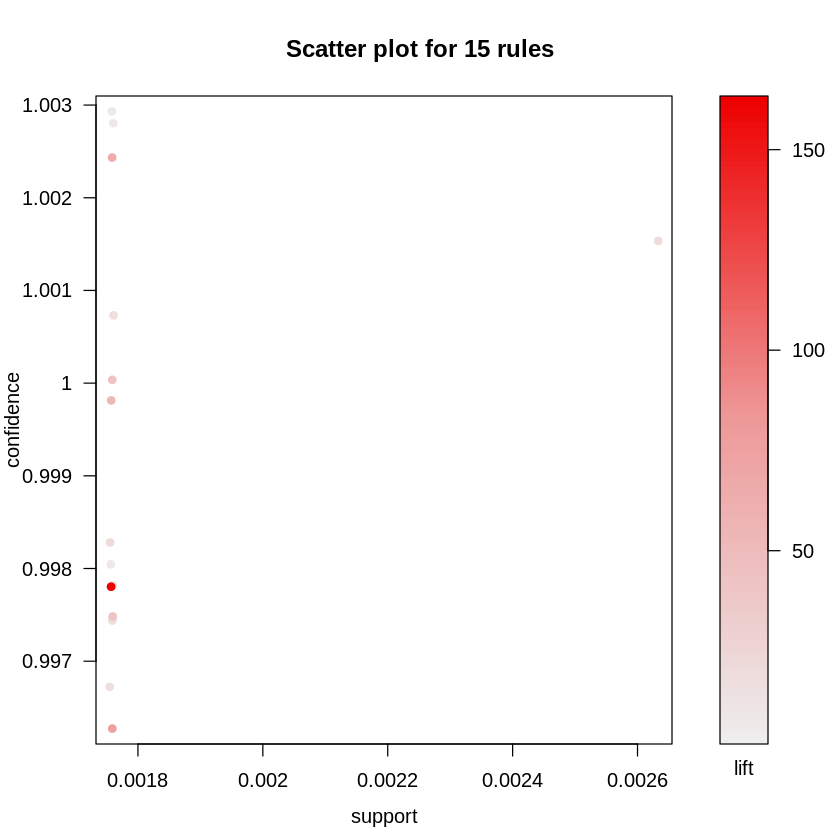

In [ ]:
#Plotting all basket rules
plot(basket_rules)

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.



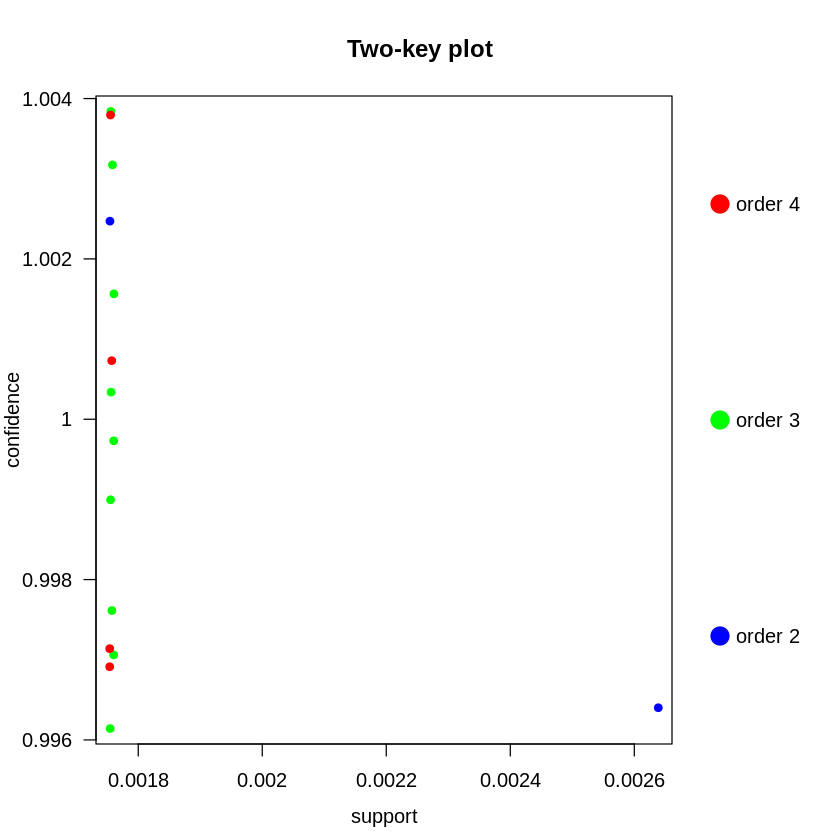

In [ ]:
plot(basket_rules,method="two-key plot")

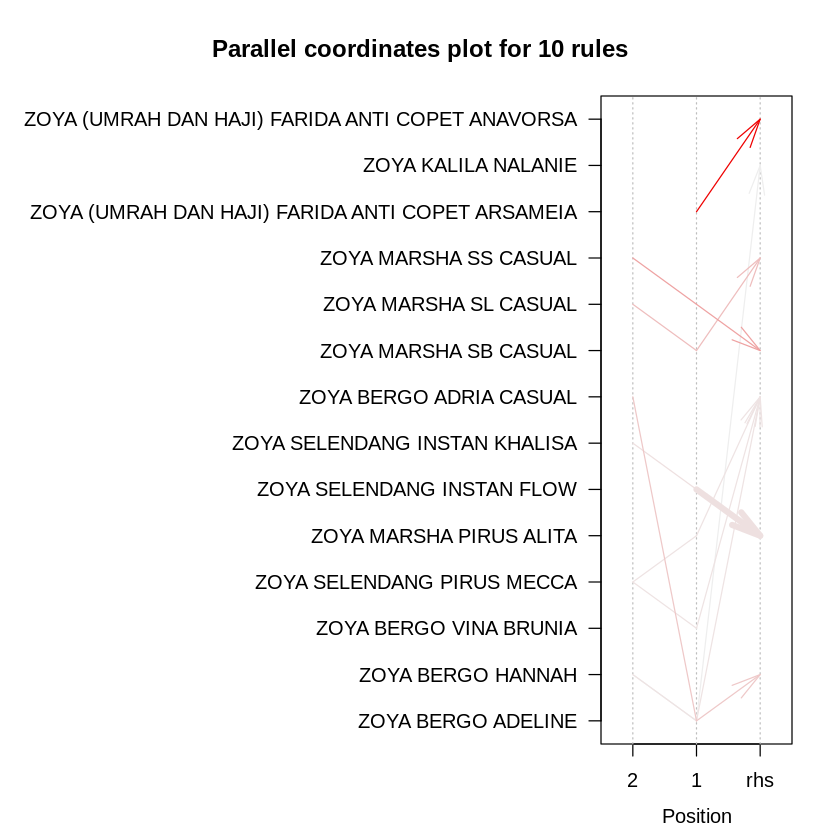

In [ ]:
#Plot of top 10 rules
top10Rules <- head(basket_rules, n = 10, by = "confidence")
plot(top10Rules, method="paracoord")

Warning message:
“Unknown control parameters: type”


Available control parameters (with default values):
main	 =  Graph for 10 rules
nodeColors	 =  c("#66CC6680", "#9999CC80")
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EE

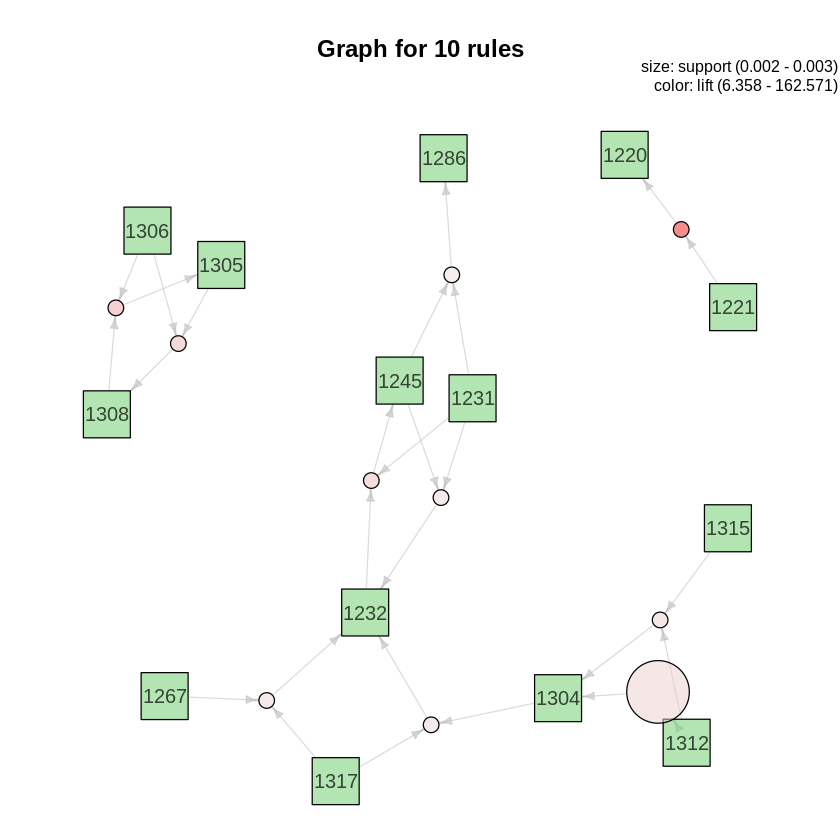

In [ ]:
plot(top10Rules, method="graph", control=list(type="itemsets"), itemLabels=FALSE)

In [ ]:
#support 0.002
#Run apriori
basket_rules <- apriori(txn,parameter = list(sup = 0.002, conf = 0.8, target="rules"))
#Summary statistics
summary(basket_rules)
inspect(head(basket_rules))
#Find minimum lift
min(basket_rules@quality$lift)
length(basket_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 2 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [78 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [1 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 1 rules

rule length distribution (lhs + rhs):sizes
2 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support           confidence    coverage             lift           count  
 Min.   :0.002636   Min.   :1    Min.   :0.002636   Min.   :19.29   Min.   :3  
 1st Qu.:0.002636   1st Qu.:1    1st Qu.:0.002636   1st Qu.:19.29   1st Qu.:3  
 Median :0.002636   Median :1    Median :0.002636   Median :19.29   Median :3  
 Mean   :0.002636   Mean   :1    Mean   :0.002636   Mean   :19.29   Mean   :3  
 3rd Qu.:0.002636   3rd Qu.:1    3rd Qu.:0.002636   3rd Qu.:19.29   3rd Qu.:3  
 Max.   :0.002636   Max.   :1    Max.   :0.002636   Max.   :19.29   Max.   :3  

mining info:
 data ntransactions support confidence
  txn          1138   0.002        0.8

    lhs                             rhs                           support confidence    coverage     lift count
[1] {ZOYA SELENDANG INSTAN FLOW} => {ZOYA MARSHA PIRUS ALITA} 0.002636204          1 0.002636204 19.28814     3


[1] 19.28814

[1] 1

In [ ]:
#Run apriori
basket_rules <- apriori(txn,parameter = list(sup = 0.0015, conf = 0.8, target="rules"))
#Summary statistics
summary(basket_rules)
inspect(head(basket_rules))
#Find minimum lift
min(basket_rules@quality$lift)
length(basket_rules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5  0.0015      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [15 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 15 rules

rule length distribution (lhs + rhs):sizes
2 3 4 
2 9 4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.000   3.000   3.133   3.500   4.000 

summary of quality measures:
    support           confidence    coverage             lift        
 Min.   :0.001757   Min.   :1    Min.   :0.001757   Min.   :  6.358  
 1st Qu.:0.001757   1st Qu.:1    1st Qu.:0.001757   1st Qu.: 16.257  
 Median :0.001757   Median :1    Median :0.001757   Median : 19.288  
 Mean   :0.001816   Mean   :1    Mean   :0.001816   Mean   : 37.357  
 3rd Qu.:0.001757   3rd Qu.:1    3rd Qu.:0.001757   3rd Qu.: 46.938  
 Max.   :0.002636   Max.   :1    Max.   :0.002636   Max.   :162.571  
     count      
 Min.   :2.000  
 1st Qu.:2.000  
 Median :2.000  
 Mean   :2.067  
 3rd Qu.:2.000  
 Max.   :3.000  

mining info:
 data ntransactions support confidence
  txn          1138  0.0015        0.8

    lhs                                                   rhs                                                    support confidence    coverage      lift count
[1] {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ARSAMEIA} => {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ANAVORSA} 0.001757469          1 0.001757469 162.57143     2
[2] {ZOYA SELENDANG INSTAN FLOW}                       => {ZOYA MARSHA PIRUS ALITA}                          0.002636204          1 0.002636204  19.28814     3
[3] {ZOYA SELENDANG INSTAN FLOW,                                                                                                                               
     ZOYA SELENDANG INSTAN KHALISA}                    => {ZOYA MARSHA PIRUS ALITA}                          0.001757469          1 0.001757469  19.28814     2
[4] {ZOYA MARSHA SB CASUAL,                                                                                                                                    
     ZOYA MARSHA SL CASUAL}             

[1] 6.357542

[1] 15

In [ ]:
productrules <- apriori(txn, parameter = list(sup=0.001, conf=0.8), appearance = list(lhs="ZOYA KALILA NALANIE",default="rhs"))
inspect(productrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
productrules <- apriori(txn, parameter = list(sup=0.001, conf=0.8), appearance = list(lhs="ZOYA MARSHA SPARKLING ZOYA",default="rhs"))
inspect(productrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
productrules <- apriori(txn, parameter = list(sup=0.001, conf=0.8), appearance = list(lhs="ZOYA BERGO ADRIA CASUAL",default="rhs"))
inspect(productrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
productrules <- apriori(txn, parameter = list(sup=0.001, conf=0.8), appearance = list(lhs="ZOYA BERGO SHOPIA",default="rhs"))
inspect(productrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
productrules <- apriori(txn, parameter = list(sup=0.001, conf=0.8), appearance = list(lhs="ZOYA BERGO HUSNA CASUAL",default="rhs"))
inspect(productrules)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 1 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[1321 item(s), 1138 transaction(s)] done [0.00s].
sorting and recoding items ... [105 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [0 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [ ]:
inspect(basket_rules)

     lhs                                                   rhs                                                    support confidence    coverage       lift count
[1]  {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ARSAMEIA} => {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ANAVORSA} 0.001757469          1 0.001757469 162.571429     2
[2]  {ZOYA SELENDANG INSTAN FLOW}                       => {ZOYA MARSHA PIRUS ALITA}                          0.002636204          1 0.002636204  19.288136     3
[3]  {ZOYA SELENDANG INSTAN FLOW,                                                                                                                                
      ZOYA SELENDANG INSTAN KHALISA}                    => {ZOYA MARSHA PIRUS ALITA}                          0.001757469          1 0.001757469  19.288136     2
[4]  {ZOYA MARSHA SB CASUAL,                                                                                                                                     
      ZOYA MARSHA SL CASUAL}

In [ ]:
#Inspecting rules in order of confidence
rules_conf <- sort (basket_rules, by="lift", decreasing=TRUE) # 'high-count' rules.
#Summary Statistics
inspect(rules_conf)

     lhs                                                   rhs                                                    support confidence    coverage       lift count
[1]  {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ARSAMEIA} => {ZOYA (UMRAH DAN HAJI) FARIDA ANTI COPET ANAVORSA} 0.001757469          1 0.001757469 162.571429     2
[2]  {ZOYA MARSHA SL CASUAL,                                                                                                                                     
      ZOYA MARSHA SS CASUAL}                            => {ZOYA MARSHA SB CASUAL}                            0.001757469          1 0.001757469  75.866667     2
[3]  {ZOYA BERGO ADRIA CASUAL,                                                                                                                                   
      ZOYA BERGO HANNAH,                                                                                                                                         
      ZOYA KALILA NALANIE}  